In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# Importing the data



In [2]:
activity = pd.read_csv('./data/dailyActivity_merged.csv')
calories = pd.read_csv('./data/dailyCalories_merged.csv')
intensities = pd.read_csv('./data/dailyIntensities_merged.csv')
heartrate = pd.read_csv('./data/heartrate_seconds_merged.csv')
sleep = pd.read_csv('./data/sleepDay_merged.csv')
weight = pd.read_csv('./data/weightLogInfo_merged.csv')

In [3]:
activity

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,04-12-2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,05-08-2016,10686,8.11,8.11,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,05-09-2016,20226,18.25,18.25,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,05-10-2016,10733,8.15,8.15,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,05-11-2016,21420,19.56,19.56,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


# 1. Formatting the data 

In [4]:
activity['ActivityDate'] = pd.to_datetime(activity['ActivityDate'])
calories['ActivityDay'] = pd.to_datetime(calories['ActivityDay'])
intensities['ActivityDay'] = pd.to_datetime(intensities['ActivityDay'])
heartrate['Time'] = pd.to_datetime(heartrate['Time'])
sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'])

In [5]:
activity['Id'].nunique()

33

In [6]:
activity[['TotalSteps','TotalDistance', 'Calories','SedentaryMinutes']].describe()

,TotalSteps,TotalDistance,Calories,SedentaryMinutes
count,940.000000,940.000000,940.000000,940.000000
mean,7637.910638,5.489702,2303.609574,991.210638
std,5087.150742,3.924606,718.166862,301.267437
min,0.000000,0.000000,0.000000,0.000000
25%,3789.750000,2.620000,1828.500000,729.750000
50%,7405.500000,5.245000,2134.000000,1057.500000
75%,10727.000000,7.712500,2793.250000,1229.500000
max,36019.000000,28.030000,4900.000000,1440.000000


In [7]:
sleep[['TotalMinutesAsleep', 'TotalTimeInBed']].describe()

,TotalMinutesAsleep,TotalTimeInBed
count,413.000000,413.000000
mean,419.467312,458.639225
std,118.344679,127.101607
min,58.000000,61.000000
25%,361.000000,403.000000
50%,433.000000,463.000000
75%,490.000000,526.000000
max,796.000000,961.000000


# 2. The Analysis

1. On average fitbit users take 7638 steps and walk around 5.5km everyday.
2. On average fitbit users consume 2303 calories.
3. On average fitbit users remain sedentary for 991 minutes
4. On average fitbit users sleep for 419 minutes i.e 7hrs per day and the average bedtime is 458 minutes.

# 3. Visuzalization of the above data

<AxesSubplot:xlabel='TotalSteps', ylabel='Count'>

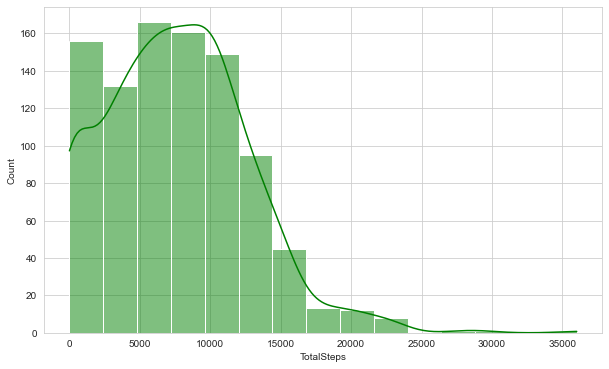

In [8]:

plt.figure(figsize=(10,6))
sns.histplot(activity, x='TotalSteps', bins=15, kde=True, color='green')



<AxesSubplot:xlabel='TotalDistance', ylabel='Count'>

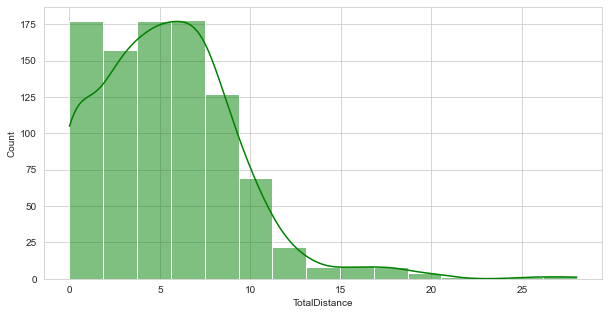

In [9]:
# Normal distribution of distance
plt.figure(figsize=(10,5))
sns.histplot(activity, x='TotalDistance', bins=15, kde=True, color='green')

<AxesSubplot:xlabel='Calories', ylabel='Count'>

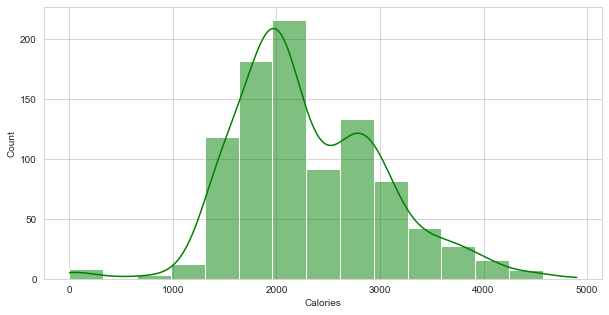

In [10]:
# Normal distribution of calories consumed by fitbit users
plt.figure(figsize=(10,5))
sns.histplot(activity, x='Calories', bins=15, kde=True, color='green')

<AxesSubplot:xlabel='SedentaryMinutes', ylabel='Count'>

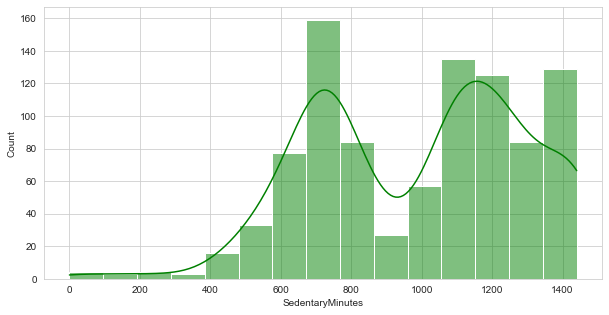

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(activity, x='SedentaryMinutes', bins=15, kde=True, color='green')

# 4. The intepretation of above Histograms

1. Most fitbit user walk between 2500- 14000 steps everday
2. Most fitbit user walk betweeen 2.5km to 10km everyday
3. Most fitbit users burn between 1000 to 3000 calories everyday
4. We have bimodal distribution curve for sendentary time. This might be because people remain sendentary mostly at night during sleep and during the day

<AxesSubplot:title={'center':'Coorelation'}>

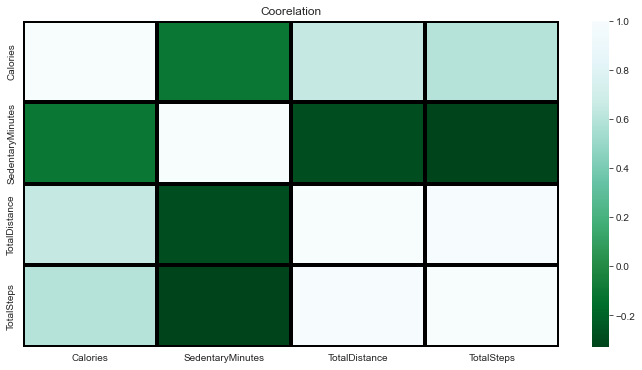

In [12]:
plt.figure(figsize=(12,6))
plt.title("Coorelation")
sns.heatmap(activity[['Calories', 'SedentaryMinutes', 'TotalDistance', 'TotalSteps']].corr(), cmap='BuGn_r', linecolor='black', linewidths=4)

# 5. The intepretation of above heatmap
1. There is a negative coorelation between sendentary minutes and other varibables like total steps, calories and total distance. This makes sense because more activity like more steps will lead to less sedentary time, more distance and more calories burning.




# 6. Sleep data analysis

<AxesSubplot:xlabel='TotalMinutesAsleep', ylabel='Count'>

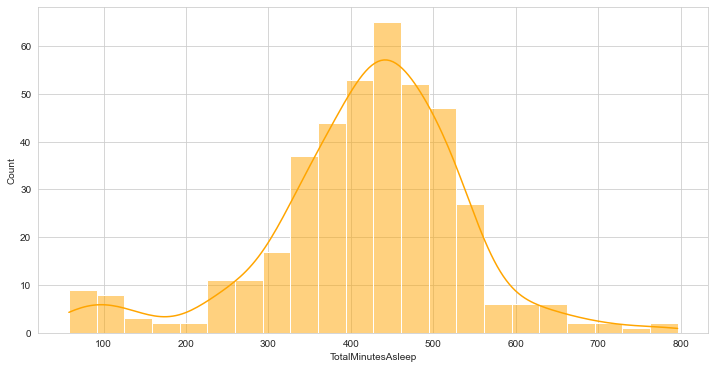

In [13]:
plt.figure(figsize=(12,6))
sns.histplot(sleep, x= 'TotalMinutesAsleep', kde=True, color='orange' )

In [18]:
sleep[['TotalMinutesAsleep', 'TotalTimeInBed']].corr()

,TotalMinutesAsleep,TotalTimeInBed
TotalMinutesAsleep,1.000000,0.930457
TotalTimeInBed,0.930457,1.000000


1. There is a positive coorelation between Total minutes asleep and Total Time in bed. Which makes sense.

In [124]:
result = pd.concat([activity, sleep], axis=1, join='inner')




<AxesSubplot:title={'center':'Calories burned Vs Total steps'}, xlabel='TotalSteps', ylabel='Calories'>

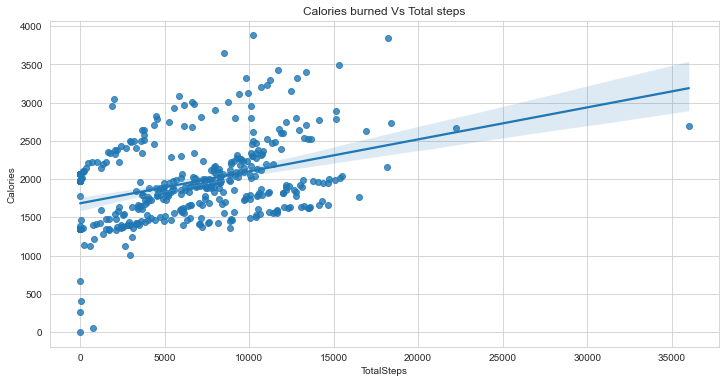

In [49]:
plt.figure(figsize=(12,6))
plt.title(label='Calories burned Vs Total steps')
sns.regplot(data=result, x='TotalSteps', y='Calories')



<AxesSubplot:title={'center':'Total Time in Bed Vs Total time slept'}, xlabel='TotalTimeInBed', ylabel='TotalMinutesAsleep'>

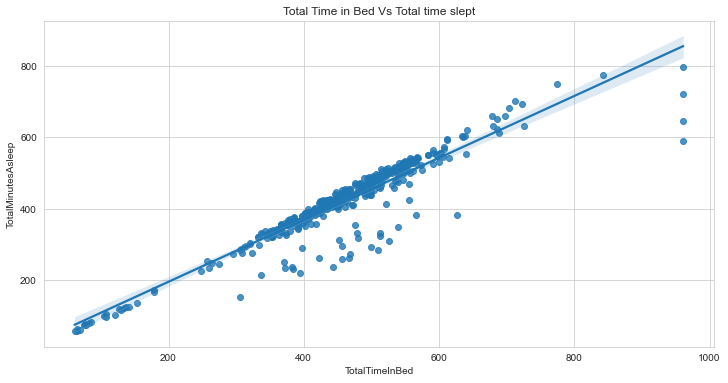

In [48]:
plt.figure(figsize=(12,6))
plt.title(label='Total Time in Bed Vs Total time slept')
sns.regplot(data=result, x='TotalTimeInBed', y='TotalMinutesAsleep')

In [111]:
int_new = intensities.groupby(by='ActivityDay', dropna=True).mean()


In [110]:
HourlyIntensity = pd.read_csv('./data/hourlyIntensities_merged.csv')

HourlyIntensity['ActivityHour'] = pd.to_datetime(HourlyIntensity['ActivityHour']).apply(lambda x: x.time()).apply(lambda x: str(x))


<AxesSubplot:title={'center':'Hourly intensity of fitband users'}, xlabel='ActivityHour', ylabel='TotalIntensity'>

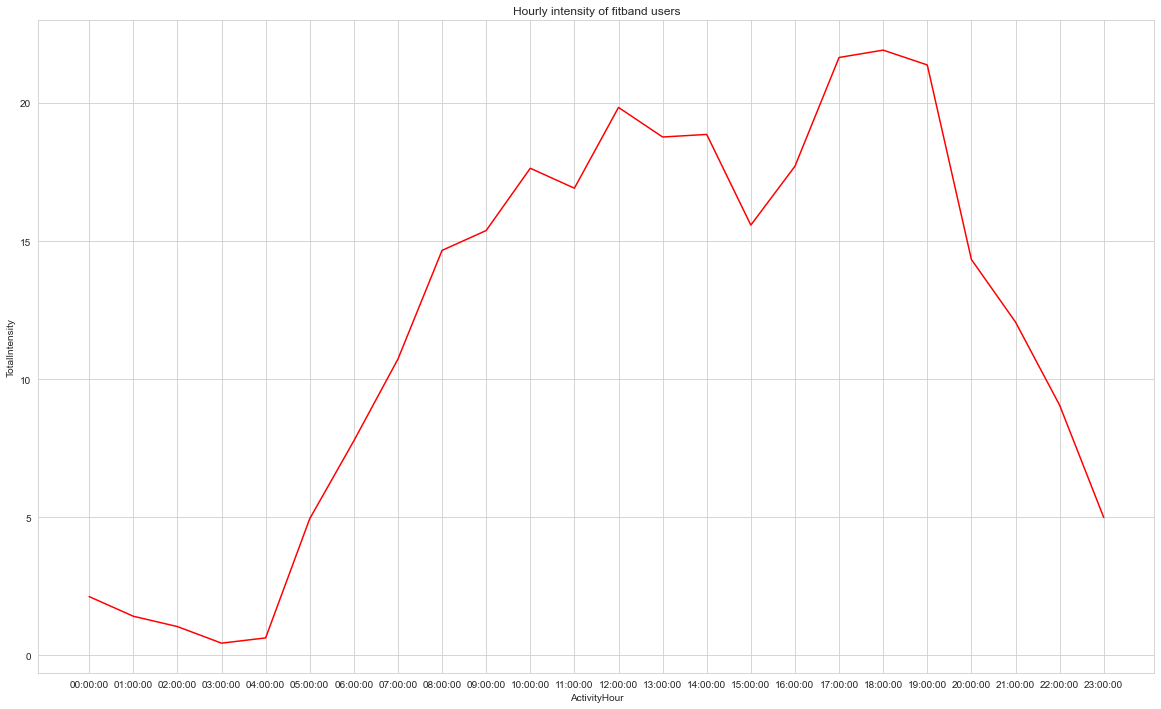

In [113]:
plt.figure(figsize=(20,12))
plt.title(label='Hourly intensity of fitband users')
new_hourlyIntensities = HourlyIntensity.groupby('ActivityHour', dropna=True).mean()
sns.lineplot(data=new_hourlyIntensities, x='ActivityHour', y='TotalIntensity', color='red')

As you can see the mostly activity is happening between 4:00 Am and 19:00 PM . There is steep decline in activity after 19:00 this could mean users are ready for sleep and bedtime.

Let us see the average hourly distribution of step by users




In [122]:
hourlySteps = pd.read_csv('./data/hourlySteps_merged.csv')
hourlySteps['ActivityHour'] = pd.to_datetime(hourlySteps['ActivityHour']).apply(lambda x: x.time()).apply(lambda x: str(x))

newHourlySteps = hourlySteps.groupby(by='ActivityHour', dropna=True).mean()


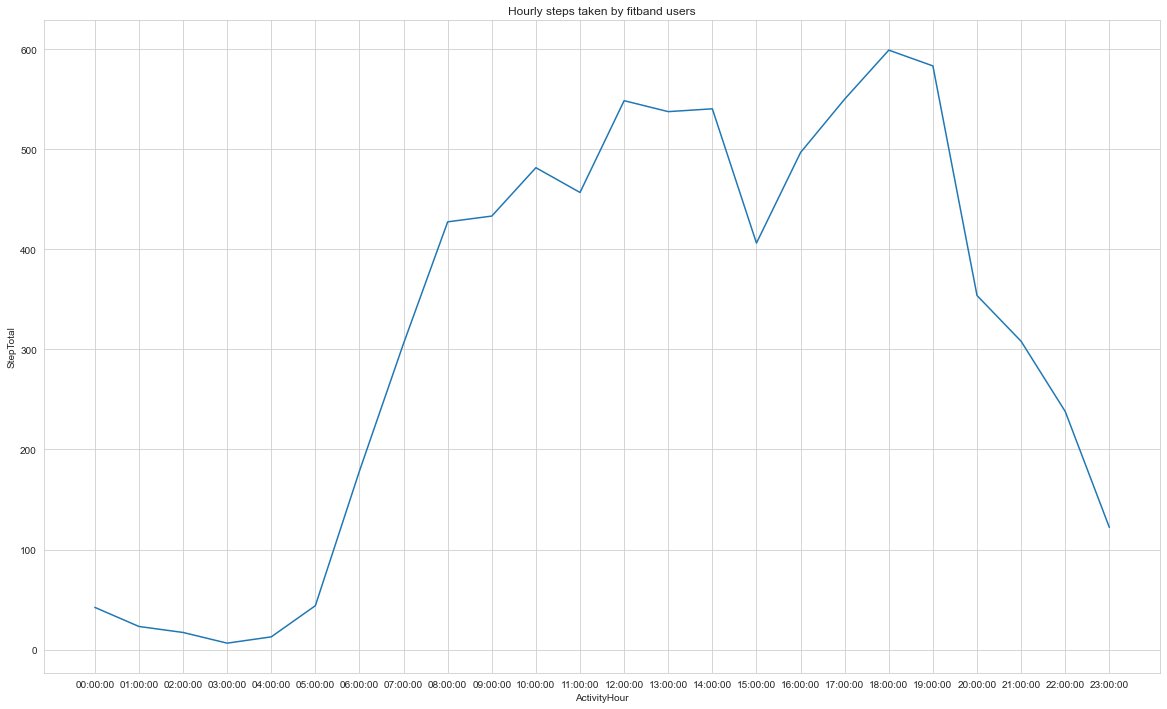

In [123]:
plt.figure(figsize=(20,12))
plt.title(label='Hourly steps taken by fitband users')
sns.lineplot(data=newHourlySteps, x='ActivityHour', y='StepTotal');

1. As you can see the line plot for hourly steps taken is similar as line plot for hourly intensity. You can see we have drop in activity after 14:00. This might because users might be taking their afternoon break.
2. Fitband app can encourage users to walk some steps during this time by sending them a notification promp
3. There is decline in average steps after 19:00 PM. You can send prompt after 19:00 PM to encourage users to walk


# 7. Conclusion

 ![Image](https://images.pexels.com/photos/235922/pexels-photo-235922.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)

1. On average fitbit users take 7638 steps and walk around 5.5km everyday. On average fitbit users burn 2303 calories.On average fitbit users remain sedentary for 991 minutesOn average fitbit users sleep for 419 minutes i.e 7hrs per day and the average bedtime is 458 minutes.

2. The activity for fitband users starts to decline after 19:00 in the evening. Hence users can be encouraged to walk more after 19:00 in the evening.

3. It is necessary for every person to take atleast 12000 steps a day. Therefore fitband company can create that as an selling pitch for its users. Since the average steps is 7638 for users. The selling pitch can come in the form of motivational notification prompts after 19:00 PM and between 14:00 Am and 15:00 AM